In [52]:
# Required to load webpages
from IPython.display import IFrame

[Table of contents](../toc.ipynb)

<img src="https://github.com/scipy/scipy/raw/master/doc/source/_static/scipyshiny_small.png" alt="Scipy" width="150" align="right">

# SciPy

* Scipy extends numpy with powerful modules in 
  * optimization, 
  * interpolation, 
  * linear algebra, 
  * fourier transformation, 
  * signal processing, 
  * image processing, 
  * file input output, and many more.
* Please find here the scipy reference for a complete feature list [https://docs.scipy.org/doc/scipy/reference/](https://docs.scipy.org/doc/scipy/reference/).

We will take a look at some features of scipy in the latter. Please explore the rich content of this package later on.

## Optimization

* Scipy's optimization module provides many optimization methods like least squares, gradient methods, BFGS, global optimization, and many more.
* Please find a detailed tutorial here [https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html).
* Next, we will apply one of the optimization algorithms in a simple example.

A common function to test optimization algorithms is the Rosenbrock function for $N$ variables:

$f(\boldsymbol{x}) = \sum\limits_{i=2}^N 100 \left(x_{i+1} - x_i^2\right)^2 + \left(1 - x_i^2 \right)^2$.

The optimum is at $x_i=1$, where $f(\boldsymbol{x})=0$

In [53]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [54]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1]**2.0)**2.0)

We need to generate some data in a mesh grid.

In [55]:
X = np.arange(-2, 2, 0.2)
Y = np.arange(-2, 2, 0.2)
X, Y = np.meshgrid(X, Y)

data = np.vstack([X.reshape(X.size), Y.reshape(Y.size)])

Let's evaluate the Rosenbrock function at the grid points.

In [56]:
Z = rosen(data)

And we will plot the function in a 3D plot.

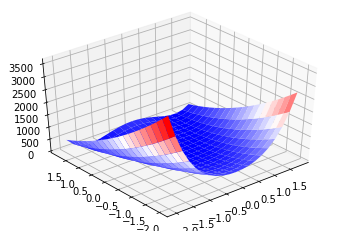

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z.reshape(X.shape), cmap='bwr')
ax.view_init(40, 230)

Now, let us check that the true minimum value is at (1, 1).

In [58]:
rosen(np.array([1, 1]))

0.0

Finally, we will call scipy optimize and find the minimum with Nelder Mead algorithm.

In [59]:
from scipy.optimize import minimize

x0 = np.array([1.3, 0.7])
res = minimize(rosen, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 72
         Function evaluations: 142
[1. 1.]


Many more optimization examples are to find in scipy optimize tutorial [https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html).

In [60]:
IFrame(src='https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html',
       width=1000, height=600)

## Interpolation

* Interpolation of data is very often required, for instance to replace NaNs or to fill missing values in data records.
* Scipy comes with
  * 1D interpolation,
  * multivariate data interpolation
  * spline, and
  * radial basis function interpolation.
* Please find here the link to interpolation tutorials [https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html).

In [61]:
from scipy.interpolate import interp1d

x = np.linspace(10, 20, 15)
y = np.sin(x) + np.cos(x**2 / 10)

f = interp1d(x, y, kind="linear")
f1 = interp1d(x, y, kind="cubic")

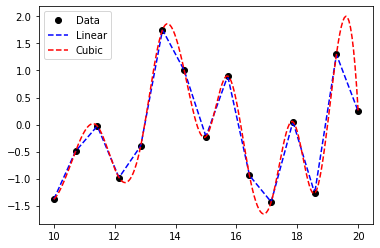

In [62]:
x_fine = np.linspace(10, 20, 200)

plt.plot(x, y, 'ko',
         x_fine, f(x_fine), 'b--',
         x_fine, f1(x_fine), 'r--')
plt.legend(["Data", "Linear", "Cubic"])
plt.show()

## Signal processing

The signal processing module is very powerful and we will have a look at its tutorial [https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html](https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html) for a quick overview.

In [63]:
IFrame(src='https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html',
       width=1000, height=600)

## Linear algebra

* In addition to numpy, scipy has its own linear algebra module.
* It offers more functionality than numpy's linear algebra module and is based on BLAS/LAPACK support, which makes it faster.
* The respective tutorial is here located [https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html](https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html).

In [64]:
IFrame(src='https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html',
       width=1000, height=600)

### Total least squares as linear algebra application

<img src="ls-tls.png" alt="LS vs TLS" width="350" align="right">

We will now implement a total least squares estimator [[Markovsky2007]](../references.bib) with help of scipy's singular value decomposition (svd). The total least squares estimator provides a solution for the errors in variables problem, where model inputs and outputs are corrupted by noise.

The model becomes
$A X \approx B$, where $A \in \mathbb{R}^{m \times n}$ and $B \in \mathbb{R}^{m \times d}$ are input and output data, and $X$ is the unknown parameter vector.

More specifically, the total least squares regression becomes 
$\widehat{A}X = \widehat{B}$, $\widehat{A} := A + \Delta A$, $\widehat{B} := B + \Delta B$.

The estimator can be written as pseudo code as follows.

$C = [A B] = U \Sigma V^\top$, where $U \Sigma V^\top$ is the svd of $C$.

$V:= \left[\begin{align}V_{11} &V_{12} \\
V_{21} & V_{22}\end{align}\right]$,

$\widehat{X} = -V_{12} V_{22}^{-1}$.

In Python, the implementation could be like this function.

In [65]:
from scipy import linalg


def tls(A, B):
    m, n = A.shape
    C = np.hstack((A, B))
    U, S, V = linalg.svd(C)
    V12 = V.T[0:n, n:]
    V22 = V.T[n:, n:]
    X = -V12 / V22
    return X

Now we create some data where input and output are appended with noise.

In [66]:
A = np.random.rand(100, 2)
X = np.array([[3], [-7]])
B = A @ X

A += np.random.randn(100, 2) * 0.1
B += np.random.randn(100, 1) * 0.1

The total least squares solution becomes

In [67]:
tls(A, B)

array([[ 2.84623341],
       [-6.99453565]])

And this solution is closer to correct value $X = [3 , -7]^\top$ than ordinary least squares.

In [68]:
linalg.solve((A.T @ A), (A.T @ B))

array([[ 2.36782022],
       [-6.38173796]])

Finally, next function shows a "self" written least squares estimator, which uses QR decomposition and back substitution. This implementation is numerically robust in contrast to normal equations

$A ^\top A X = A^\top B$.

Please find more explanation in [[Golub2013]](../references.bib) and in section 3.11 of [[Burg2012]](../references.bib).

In [69]:
def ls(A, B):
    Q, R = linalg.qr(A, mode="economic")
    z = Q.T @ B

    return linalg.solve_triangular(R, z)

In [70]:
ls(A, B)

array([[ 2.36782022],
       [-6.38173796]])

## Integration

* Scipy's integration can be used for general equations as well as for ordinary differential equations.
* The integration tutorial is linked here [https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html).

### Solving a differential equation

Here, we want to use an ode solver to simulate the differential equation (ode)

$y'' + y' + 4 y = 0$. 

To evaluate this second order ode, we need to convert it into a set of first order ode. The trick is to use this substitution: $x_0 = y$, $x_1 = y'$, which yields

$\begin{align}
x'_0 &= x_1 \\
x'_1 &= -4 x_0 - x_1
\end{align}$

The implementation in Python becomes.

In [71]:
def equation(t, x):
    return [x[1], -4 * x[0] - x[1]]

In [72]:
from scipy.integrate import solve_ivp

In [73]:
time_span = [0, 20]
init = [1, 0]
time = np.arange(0, 20, 0.01)
sol = solve_ivp(equation, time_span, init, t_eval=time)

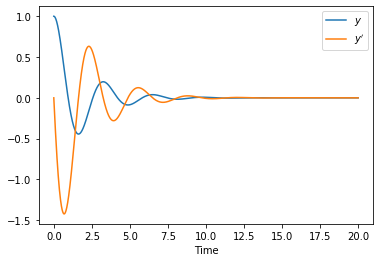

In [74]:
plt.plot(time, sol.y[0, :])
plt.plot(time, sol.y[1, :])
plt.legend(["$y$", "$y'$"])
plt.xlabel("Time")
plt.show()